# **Description**

In this analysis, I examined the performance(my assumption*) of various phone brands in Myanmar over three months according to the given data sheets for case study assignment.

---


The data was cleaned and structured to focus on the ten columns, which represent different brands and their respective values for each month.


---
My analysis includes five steps; 1. Importing necessary libraries, 2. Understanding Data, 3. Data Cleaning for better accuracy, 4. Data Preprocessing for better data understanding and finally, 5. Identifying and Visualizing Peaks for our anlaysis goal.

---



The peak values for each brand were identified, along with the months in which these peaks occurred.


---

The results are summarized in the table below:

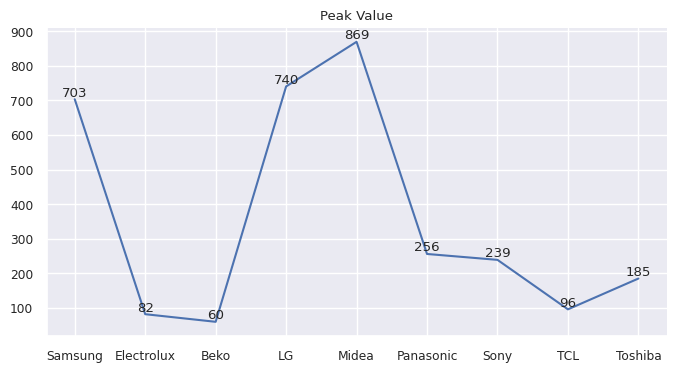


---

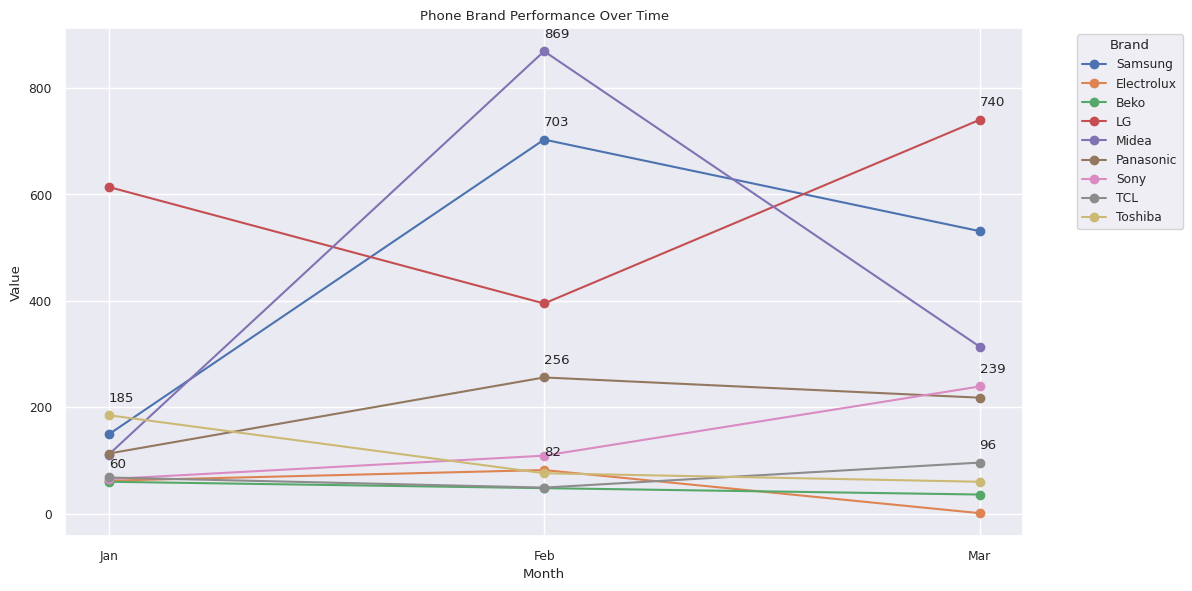

# 1. Importing Necessary Libraries


In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Understanding the Data

In [199]:
df = pd.read_csv('/content/Case Study Data - Phone Brands.xlsx - Sheet1.csv')
df

,Column 1,Samsung,Electrolux,Beko,LG,Midea,Panasonic,Sony,TCL,Toshiba
0,Jan,149,62,60,614,111,113,65,68,185
1,Feb,703,82,48,395,869,256,109,49,76
2,Mar,531,1,36,740,314,218,239,96,60


In [200]:
df.shape

(3, 10)

In [201]:
df.columns

Index(['Column 1', 'Samsung', 'Electrolux', 'Beko', 'LG', 'Midea', 'Panasonic',
       'Sony', 'TCL', 'Toshiba'],
      dtype='object')

# 3. Cleaning Data

In [202]:
# Clean the data
df = df.dropna(how='all')  # Remove rows that are all empty

In [203]:
df.isna().sum()

Column 1      0
Samsung       0
Electrolux    0
Beko          0
LG            0
Midea         0
Panasonic     0
Sony          0
TCL           0
Toshiba       0
dtype: int64

In [204]:
# Check null value
df.isnull()
df.isnull().sum()

Column 1      0
Samsung       0
Electrolux    0
Beko          0
LG            0
Midea         0
Panasonic     0
Sony          0
TCL           0
Toshiba       0
dtype: int64

# 4. Data Preprocessing

In [205]:
# Renaming columns for better understanding
df.rename(columns={df.columns[0]: 'Month'}, inplace=True)  # Rename first column to 'Month'

In [206]:
df.columns # Recheck

Index(['Month', 'Samsung', 'Electrolux', 'Beko', 'LG', 'Midea', 'Panasonic',
       'Sony', 'TCL', 'Toshiba'],
      dtype='object')

In [207]:
df.set_index('Month', inplace=True) # Setting index

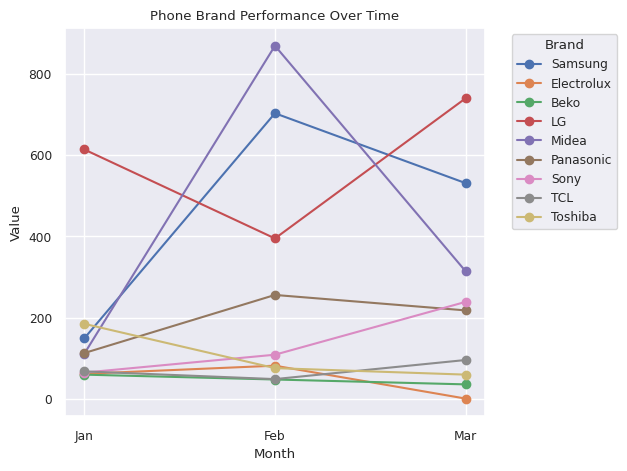

In [214]:
# Create a line plot to better understand our data
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Phone Brand Performance Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# 5. Identifying and Visualizing Peaks

In [215]:
# Identify peak values and months

peak_values = df.max()
peak_months = df.idxmax()
peak_values

Samsung       703
Electrolux     82
Beko           60
LG            740
Midea         869
Panasonic     256
Sony          239
TCL            96
Toshiba       185
dtype: int64

In [216]:
peak_months

Samsung       Feb
Electrolux    Feb
Beko          Jan
LG            Mar
Midea         Feb
Panasonic     Feb
Sony          Mar
TCL           Mar
Toshiba       Jan
dtype: object

Creating a new DataFrame with Peak Columns

In [217]:
peak_df = pd.DataFrame({'Peak Value': peak_values, 'Peak Month': peak_months})
peak_df

,Peak Value,Peak Month
Samsung,703,Feb
Electrolux,82,Feb
Beko,60,Jan
LG,740,Mar
Midea,869,Feb
Panasonic,256,Feb
Sony,239,Mar
TCL,96,Mar
Toshiba,185,Jan


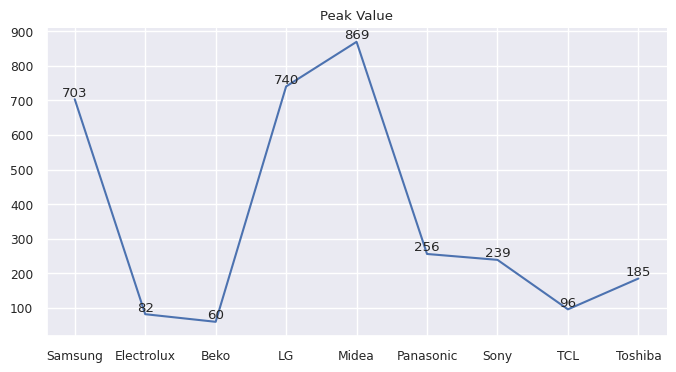

In [218]:
# Visualize Peak DataFrame
peak_df['Peak Value'].plot(kind='line', figsize=(8, 4), title='Peak Value')
plt.gca().spines[['top', 'right']].set_visible(False)

for x, y in enumerate(peak_df['Peak Value']):
    plt.text(x, y, str(y), ha='center', va='bottom')

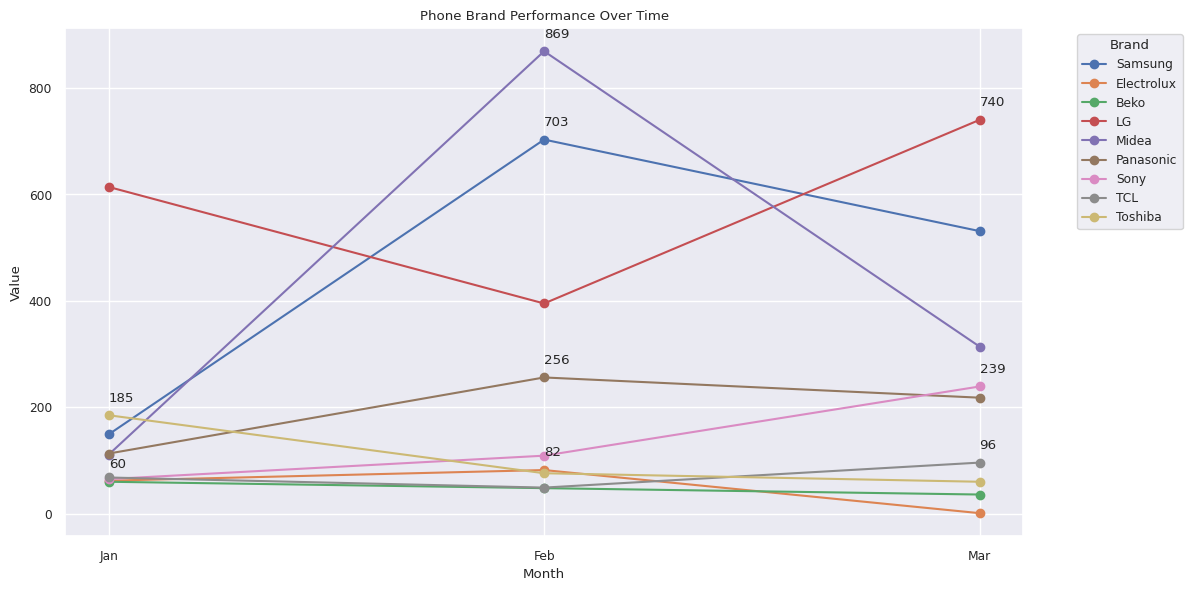

In [219]:
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)
    peak_value = df[column].max()
    peak_month = df[column].idxmax()
    plt.annotate(f'{peak_value}', (peak_month, peak_value), textcoords="offset points", xytext=(0,10))
plt.title('Phone Brand Performance Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()